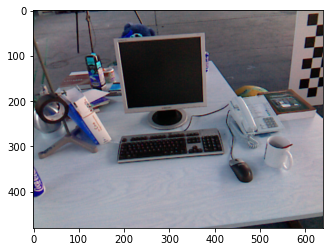

In [7]:
#Implementiong Laplacian and Canny edge detection
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import argparse
#img1 = cv.imread('E:\Photos\img1.png')
img1 = cv.imread('img1.png')
#cv.imwrite("RGB-Image",img1)
plt.imshow(img1)

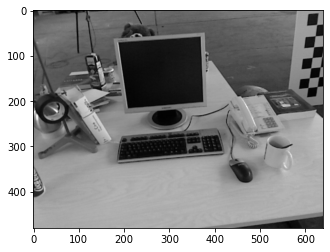

In [3]:
gray_scale = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
#cv.imwrite('Gray Scale image',gray_scale)
plt.imshow(gray_scale,cmap='gray')

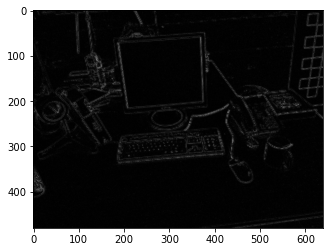

In [4]:
#laplacian
laplacian = cv.Laplacian(gray_scale, cv.CV_64F)
laplacian = np.uint8(np.absolute(laplacian)) 
#cv.imwrite('Laplacian Edges',laplacian)
# we compute absolute value of images as images do not have negative pixel value and this way all pixel values are converted to absolute values.
plt.imshow(laplacian,cmap='gray')

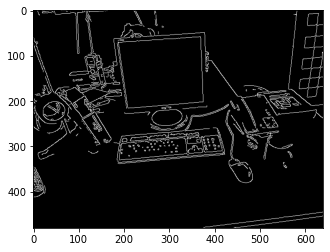

In [5]:
#Canny
canny = cv.Canny(gray_scale, 100, 170)
#cv.imwrite('Canny Edges',canny)
plt.imshow(canny,cmap='gray')

(<matplotlib.image.AxesImage at 0x1dd62217190>,
 Text(0.5, 1.0, 'Harris point detection'))

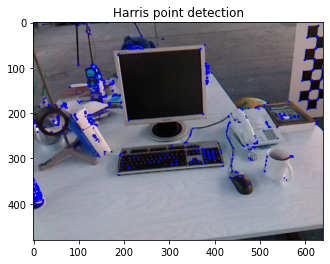

In [9]:
#Harris point Detection
gray = np.float32(gray_scale)
harris = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners
harris = cv.dilate(harris,None)
# Threshold for an optimal value, it may vary depending on the image.
img1[harris>0.01*harris.max()]=[0,0,255]
#cv.imwrite('Harris edges',img1)
plt.imshow(img1),plt.title("Harris point detection")


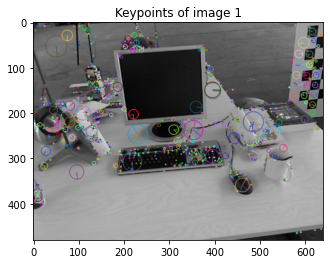

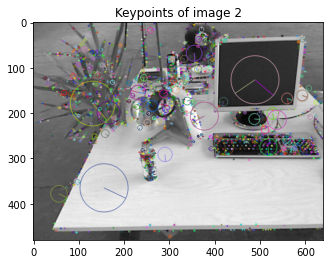

(Text(0.5, 1.0, 'Matching keypoints/features of two images'),
 <matplotlib.image.AxesImage at 0x1dd5f31a8e0>)

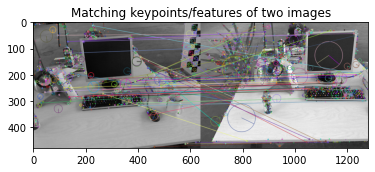

In [16]:
#reading images
img1 = cv.imread('img1.png')
img2 = cv.imread('img2.png')

#converting images to gray scale
gray_scale1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray_scale2=cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

#SIFT
sift = cv.SIFT_create()

# Keypoints location and flaging them with circles
kp1 = sift.detect(gray_scale1,None)
kp2 = sift.detect(gray_scale2,None)

img1=cv.drawKeypoints(gray_scale1,kp1,img1,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.title('Keypoints of image 1')
plt.imshow(img1),plt.show()

img2=cv.drawKeypoints(gray_scale2,kp2,img2,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.title('Keypoints of image 2')
plt.imshow(img2),plt.show()


#Detecting and computing feature descriptors
kp1, des1 = sift.detectAndCompute(gray_scale1,None)
kp2, des2 = sift.detectAndCompute(gray_scale2,None)

#matching features
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:50],img2,flags=2)
plt.title('Matching keypoints/features of two images'), plt.imshow(img3),


